<a href="https://colab.research.google.com/github/abia200304/IIIT-Hyderabad-Research_works/blob/main/tcn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -o /content/archive.zip

Archive:  /content/archive.zip
  inflating: Traffic.csv             
  inflating: TrafficTwoMonth.csv     


In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.model_selection import  train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf

file_path='/content/TrafficTwoMonth.csv'
df=pd.read_csv(file_path)
display(df)


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [ ]:
cols=list(df.columns)

In [ ]:
cols

['Time',
 'Date',
 'Day of the week',
 'CarCount',
 'BikeCount',
 'BusCount',
 'TruckCount',
 'Total',
 'Traffic Situation']

In [ ]:
column_3_data = df.iloc[:, 3]
column_4_data = df.iloc[:, 4]
column_5_data = df.iloc[:, 5]
column_6_data = df.iloc[:, 6]


In [ ]:
coloumn_3_data=np.array(column_3_data)
coloumn_4_data=np.array(column_4_data)
coloumn_5_data=np.array(column_5_data)
coloumn_6_data=np.array(column_6_data)


In [ ]:
column3_data=coloumn_3_data.reshape(-1,1)
column4_data =coloumn_4_data.reshape(-1,1)
column5_data=coloumn_5_data.reshape(-1,1)
column6_data=coloumn_6_data.reshape(-1,1)

In [ ]:
data = np.concatenate([ column3_data,column4_data,column5_data,column6_data],axis =1)

In [ ]:
scalar=MinMaxScaler((0,1))
scaled_data=scalar.fit_transform(data)

In [ ]:
scaled_data.shape

(5952, 4)

In [ ]:
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, :])
    return np.array(X), np.array(Y)
time_step = 15
X, Y= create_dataset(scaled_data, time_step)
print(X.shape)
print(Y.shape)


(5937, 15, 4)
(5937, 4)


In [ ]:
X_train=X[:int(0.8*len(X))]
y_train = Y[:int(0.8*len(Y))].reshape(-1,4)
X_test = X[int(0.8*len(X)):]
y_test = Y[int(0.8*len(Y)):].reshape(-1,4)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4749, 15, 4)
(4749, 4)
(1188, 15, 4)
(1188, 4)


In [ ]:
!pip install keras-tcn

In [ ]:
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.models import Model
from keras import regularizers
from tcn import TCN
inputs=Input(shape=(15,4))
x = TCN(nb_filters=48, kernel_size=5, dilations=[1, 2, 4, 8] )(inputs)
x = Dropout(0.5)(x)

outputs=Dense(4,kernel_regularizer=regularizers.l2(0.1))(x)
model=Model(inputs=inputs,outputs=outputs)

model.compile(optimizer='adam',loss='mae')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 15, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tcn (TCN)                       │ (None, 48)             │        82,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,420 (321.95 KB)

 Trainable params: 82,420 (321.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train,y_train,epochs=50,validation_split=0.15,verbose=1)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 1.1301 - val_loss: 0.4332
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3736 - val_loss: 0.2275
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2003 - val_loss: 0.1454
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1356 - val_loss: 0.1275
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1160 - val_loss: 0.1140
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1076 - val_loss: 0.1104
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1049 - val_loss: 0.1110
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1016 - val_loss: 0.1085
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1008 - val_loss: 0.1081
Epoch 10/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1011 - val_loss: 0.1093
Epoch 11/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0988 - val_loss: 0.1090
Epoch 12/50
127/127 ━━━━━━━━━━━━━━━━━━━━

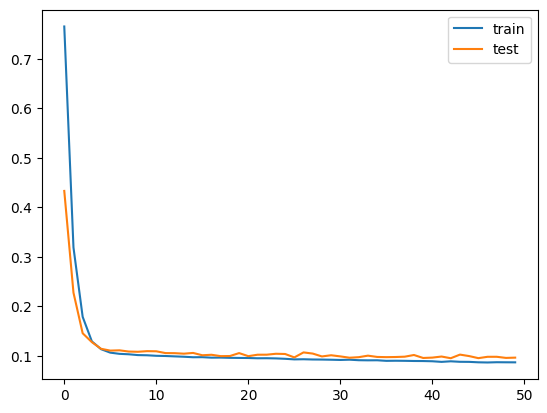

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
y_pred=model.predict(X_test)
test_predict=model.predict(X_test)
print(test_predict.shape)
predictions_original_scale = scalar.inverse_transform(test_predict)
y_test_original_scale = scalar.inverse_transform(y_test)
mae=mean_absolute_error(predictions_original_scale,y_test_original_scale,)
mse=np.sqrt(mean_squared_error(predictions_original_scale,y_test_original_scale,))
mape=mean_absolute_percentage_error(predictions_original_scale,y_test_original_scale,)
rmse=np.sqrt(mse)
print(rmse)
print(mse)
print(mae)
print(mape)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(1188, 4)
3.6514595270530696
13.333156677706626
8.321710461957586
0.4814835009055204


In [ ]:
print(predictions_original_scale)
print(y_test_original_scale)

[[90.94465   16.76995   25.279755  13.66575  ]
 [79.82476   16.20873   27.994097  11.91477  ]
 [92.896904  18.470366  28.023125  11.503434 ]
 ...
 [13.287408   2.1572387  0.8905465 28.627111 ]
 [15.455599   2.2397072  1.0850446 27.536295 ]
 [14.774011   2.1920905  0.990168  27.695116 ]]
[[45. 24. 31. 11.]
 [80. 26. 35.  6.]
 [83. 18.  6. 15.]
 ...
 [15.  4.  1. 25.]
 [16.  5.  0. 27.]
 [14.  3.  1. 15.]]
